# Redes Neurais Artificiais 2024.1


## Implementação de Redes Neurais com Sci-Kit Learn

* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)


### Contexto: Consumo de Combustível

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso das bibliotecas pandas e sci-kit learn para prever o consumo de combustível de veículos.

### Base de Dados

Disponível em: https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [2]:
data = pd.read_csv("autompg.csv", sep=';')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. Quais os nomes dos carros existentes no dataset?
4. Quais as características do 'chevrolet camaro'?
5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [3]:
len(data)

406

In [4]:
print(list(data.columns))

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'name']


In [5]:
print(data["name"])

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
401              ford mustang gl
402                    vw pickup
403                dodge rampage
404                  ford ranger
405                   chevy s-10
Name: name, Length: 406, dtype: object


In [6]:
data.loc[data['name'] == 'chevrolet camaro']

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [7]:
data['mpg'].mean()

23.514572864321607

### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
2. Exclua a coluna com os nomes dos carros
3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [8]:
data = data.dropna()
len(data)

392

In [9]:
data.drop('name', axis=1, inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [10]:
data['mpg'] *= 0.425
data['mpg'] = round(data['mpg'], 2)

In [11]:
data.rename(columns={'mpg': 'kml'}, inplace=True)
data.head()

,kml,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,7.65,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,6.38,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,7.65,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,6.80,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,7.22,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [12]:
X = data.drop('kml', axis=1)
Y = data['kml']

In [13]:
# Necessário importar: from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [14]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression()

### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [15]:
pred = regr.predict(X_test[2:3])
print(pred, Y_test.iloc[2])
print(pred == Y_test.iloc[2])

[8.79896036] 9.78
[False]


### Teste do modelo

1. Obtenha o R^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [16]:
Y_predito = regr.predict(X_test)
r2_score(Y_test, Y_predito)

0.8330641962946288

### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

In [17]:
residuos = []
for (x,y) in zip(Y_test,Y_predito):
    residuos.append((x-y)**2)
residuos

[3.111601507995217,
 1.2605310424295262,
 0.962438781584095,
 0.32964954453306206,
 0.2531548698549424,
 0.6057404424207988,
 0.2654528075624117,
 1.4075741851508734,
 2.6834898485080396,
 10.343113915539572,
 0.4482634700487185,
 0.09553546381504283,
 1.47135886947907,
 0.09773209592980628,
 0.002328712671939341,
 0.3929744500502531,
 0.4034009807779996,
 0.750992094343746,
 0.7676180784858097,
 0.7692321493862007,
 0.4660669399336149,
 1.0757939338741183,
 0.7427706164638698,
 1.1334255349429287,
 0.8221619624187095,
 1.1054232184716242,
 0.3747528495982095,
 2.3055454530395805,
 0.12808344543867498,
 0.7984265931963527,
 7.4075785189614,
 0.4595368976691853,
 0.06729487111413147,
 0.025479497933506783,
 1.5181057847123265,
 0.32156648350494743,
 3.2535106703128425,
 0.05146506624726694,
 0.6350825115013373,
 1.0754305307280698,
 4.02683544630739,
 0.17121723295535501,
 0.4805336126971418,
 0.0031400585457750803,
 0.09203762706391558,
 0.26192714391089844,
 0.13015656383321586,
 0.12

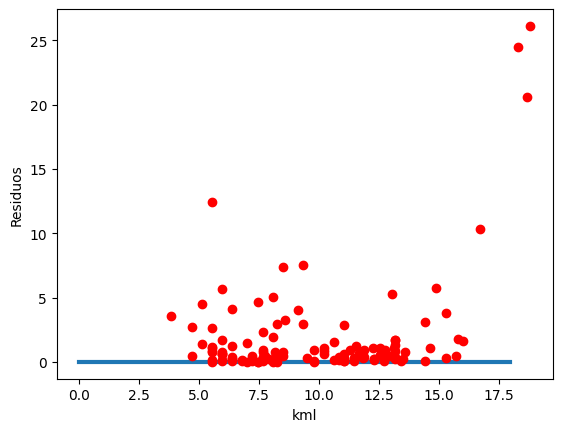

In [18]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residuos,'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.show()

## Propondo RNAs MLP

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Proposição de uma RNA MLP de Camada Única

1. Consulte a documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
2. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
3. Obtenha o $R^2$ do conjunto de testes

In [19]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [20]:
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', verbose=True, max_iter=300)
mlp.fit(X_train_std, Y_train)

Y_mlp = mlp.predict(X_test_std)

print(f"R2 score = {r2_score(Y_test, Y_mlp)}")

Iteration 1, loss = 59478.80775112
Iteration 2, loss = 55451.92287356
Iteration 3, loss = 51577.82188023
Iteration 4, loss = 47858.97578655
Iteration 5, loss = 44299.33279839
Iteration 6, loss = 40900.56995019
Iteration 7, loss = 37665.23719814
Iteration 8, loss = 34592.41381755
Iteration 9, loss = 31686.37624571
Iteration 10, loss = 28942.96728400
Iteration 11, loss = 26363.10397197
Iteration 12, loss = 23943.17745930
Iteration 13, loss = 21681.13450060
Iteration 14, loss = 19572.30233474
Iteration 15, loss = 17614.17357995
Iteration 16, loss = 15803.47738950
Iteration 17, loss = 14130.18350862
Iteration 18, loss = 12591.94187359
Iteration 19, loss = 11183.47745415
Iteration 20, loss = 9896.95840307
Iteration 21, loss = 8726.96410166
Iteration 22, loss = 7666.01138621
Iteration 23, loss = 6707.84747989
Iteration 24, loss = 5847.07094347
Iteration 25, loss = 5075.12671678
Iteration 26, loss = 4387.11096432
Iteration 27, loss = 3775.44095929
Iteration 28, loss = 3234.80233651
Iteration 

### Proposição de uma RNA MLP com duas camadas ocultas

1. Treine uma rede neural multilayer perceptron para este problema com duas camadas ocultas, com número de neurônios à sua escolha  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
2. Obtenha o $R^2$ do conjunto de testes

In [21]:
mlp2 = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', verbose=True, max_iter=300)
mlp2.fit(X_train_std, Y_train)

Y_mlp2 = mlp2.predict(X_test_std)

print(f"R2 score = {r2_score(Y_test, Y_mlp2)}")

Iteration 1, loss = 164.43422220
Iteration 2, loss = 129.89553225
Iteration 3, loss = 14.83820500
Iteration 4, loss = 67.81446299
Iteration 5, loss = 31.06080907
Iteration 6, loss = 18.54723547
Iteration 7, loss = 39.77367168
Iteration 8, loss = 10.80927719
Iteration 9, loss = 18.52379564
Iteration 10, loss = 20.05795822
Iteration 11, loss = 6.73085950
Iteration 12, loss = 15.36938887
Iteration 13, loss = 11.33361080
Iteration 14, loss = 6.89361187
Iteration 15, loss = 12.21862444
Iteration 16, loss = 7.19643655
Iteration 17, loss = 8.33506940
Iteration 18, loss = 9.56427481
Iteration 19, loss = 6.08871699
Iteration 20, loss = 7.89168802
Iteration 21, loss = 6.78545330
Iteration 22, loss = 6.37786488
Iteration 23, loss = 7.10250997
Iteration 24, loss = 5.95850041
Iteration 25, loss = 7.39557255
Iteration 26, loss = 6.26360638
Iteration 27, loss = 6.65686261
Iteration 28, loss = 6.60888216
Iteration 29, loss = 6.06267296
Iteration 30, loss = 6.35324704
Iteration 31, loss = 5.97180357
It

### Para Discussão

- Qual melhor modelo para este problema?

Ambos os modelos de redes neurais, com 10 neurônios na camada escondida, apresentaram desempenho insastifatórios e apresentaram baixa melhora entre as interações. Usando mais neurônios no modelo com 2 camadas escondidas, melhorou drasticamente o desempenho do modelo, porém ainda apresentando resultados piores que o da regressão linear.